#Configuration of the notebook and data importation

In [ ]:
#Installation of the required package

!pip install scanpy
!pip install louvain

     |████████████████████████████████| 7.2MB 2.5MB/s 
     |████████████████████████████████| 122kB 43.2MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 2.2MB 2.7MB/s 
     |████████████████████████████████| 3.2MB 22.7MB/s 


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 louvain==0.7.0


In [ ]:
sc.settings.set_figure_params(dpi=80, color_map='plasma')

In [ ]:
#Connexion to the goole drive files
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
save_file = '/content/drive/My Drive/ClinCluster_DataIntegration/Notebook_Dataset2/scanpy_DR.h5ad'
adata = sc.read_h5ad(save_file)
adata

AnnData object with n_obs × n_vars = 4952 × 24008
    obs: 'lib_prep', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'percent_ribo', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'lib_prep_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

#Clustering 

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


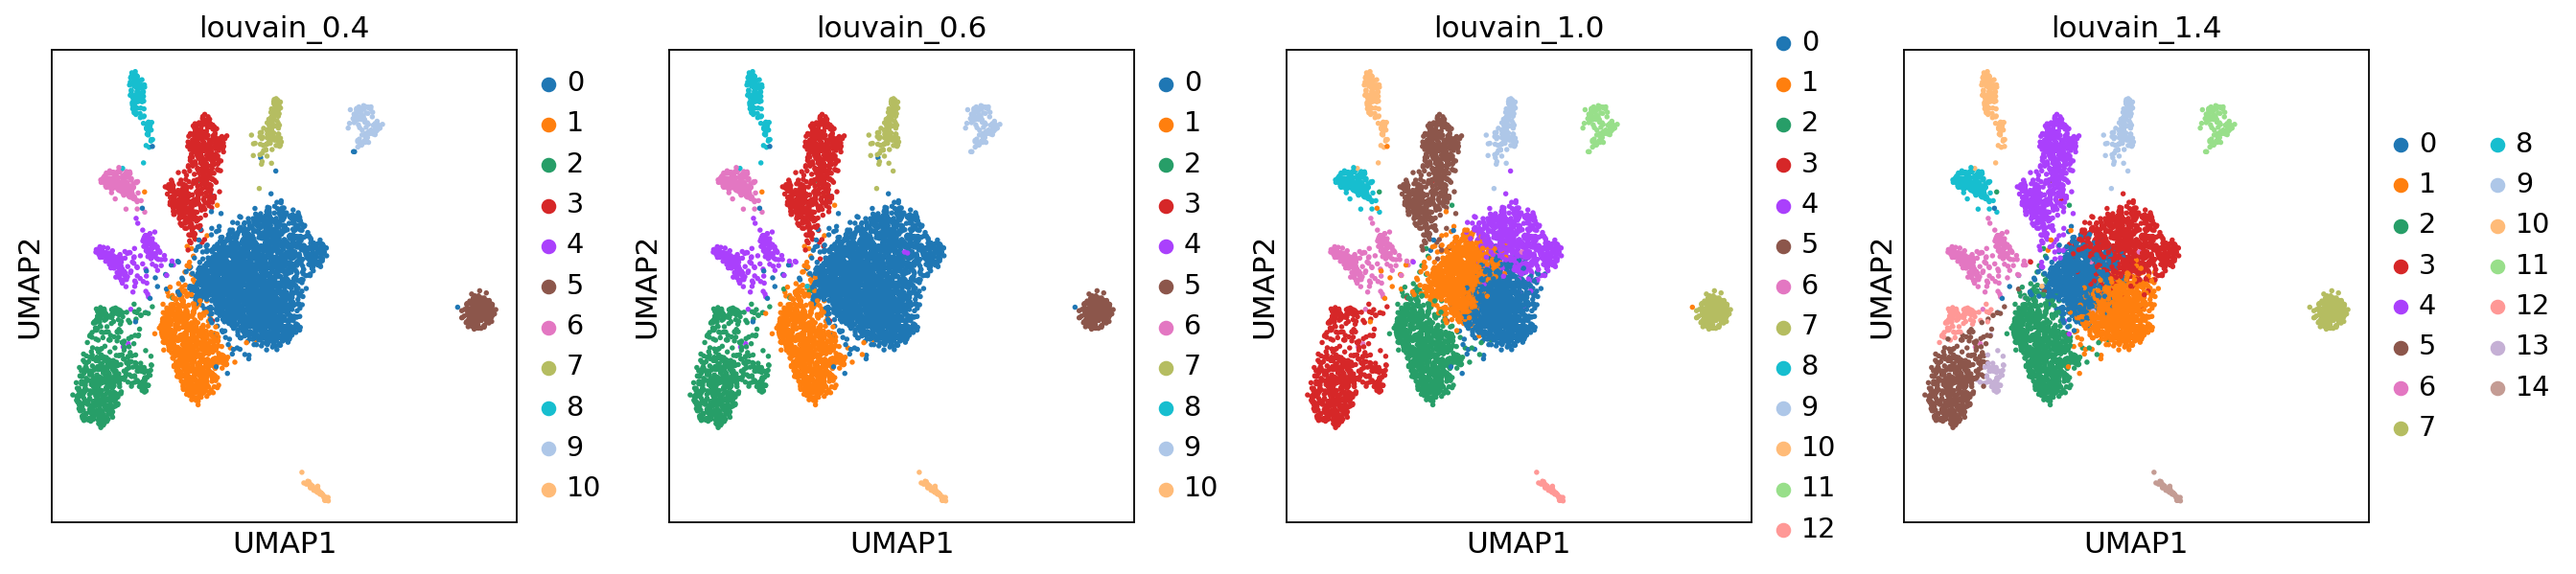

In [ ]:
#Clustering with Louvain algorithm

sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_1.0','louvain_1.4'])

#Marker genes

ranking genes


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


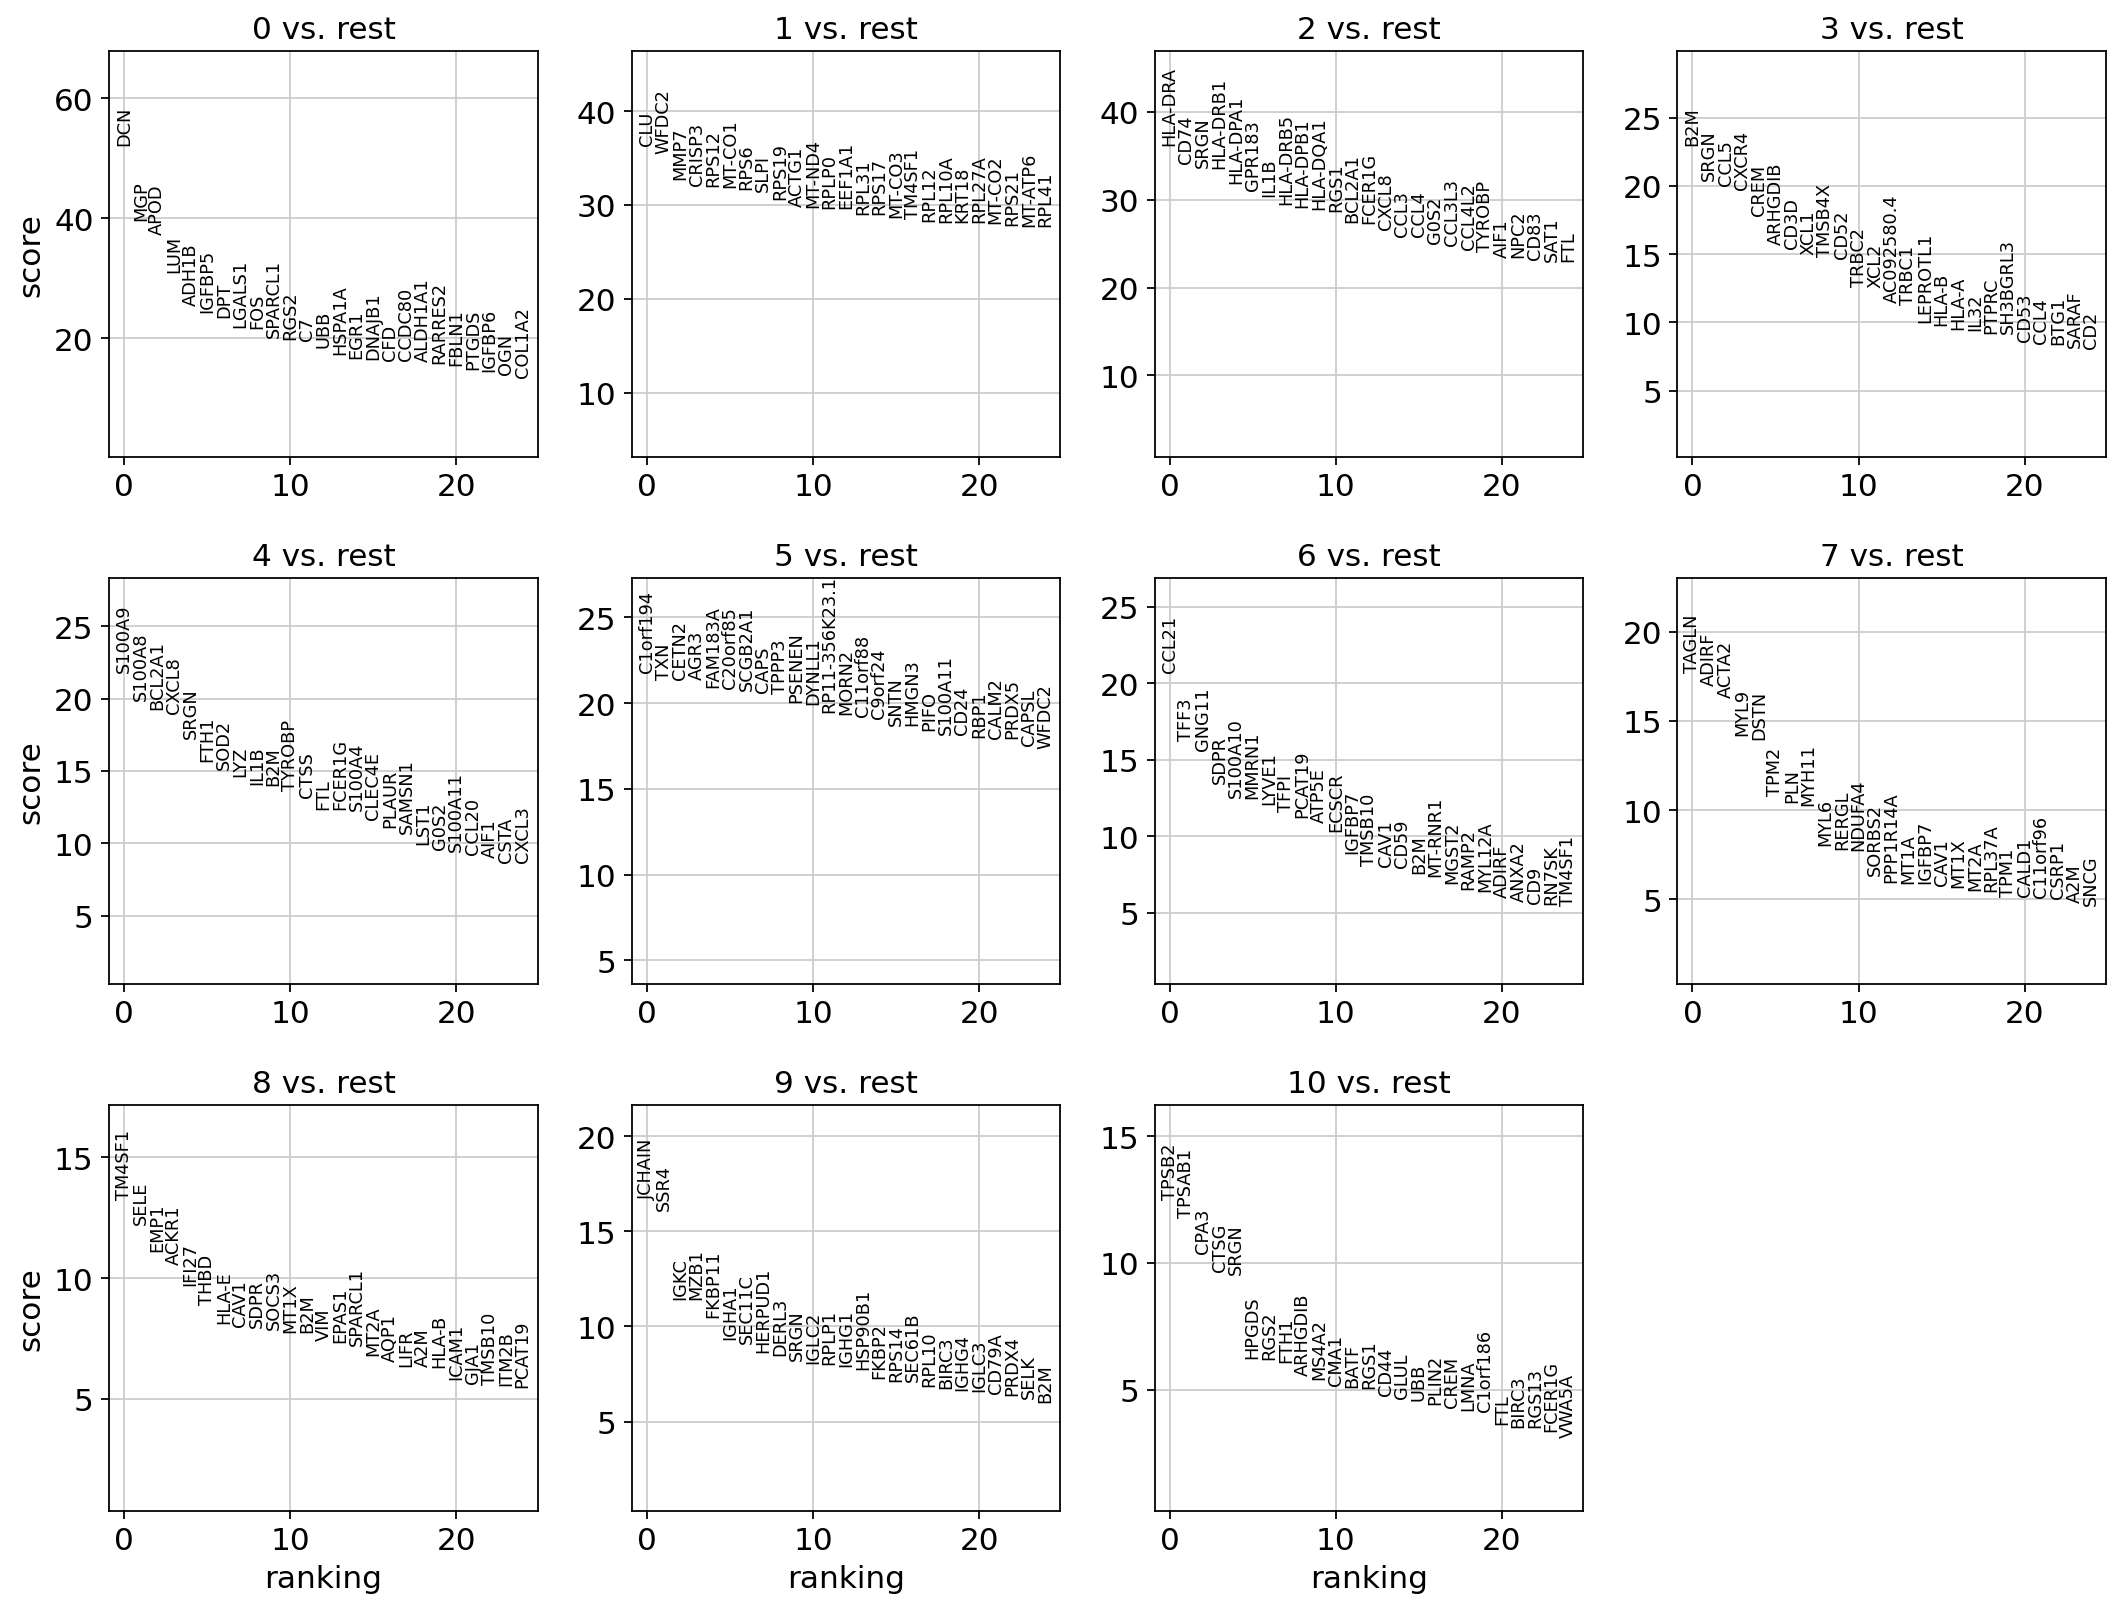

In [ ]:
#method using the wilcoxon test
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='wilcoxon', n_genes = 1000)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
from google.colab import files
adata.write('/content/drive/My Drive/ClinCluster_DataIntegration/Notebook_Dataset2/clustering_transitional_results.h5ad')

print('Edited transitional file.')

Edited.


In [ ]:
#Saving the .csv files containing the marker genes
adata = sc.read("/content/drive/My Drive/ClinCluster_DataIntegration/Notebook_Dataset2/clustering_transitional_results.h5ad")
df=pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(100)


from google.colab import files
df.to_csv('/content/drive/My Drive/ClinCluster_DataIntegration/Notebook_Dataset2/marker_genes.csv')
print('Edited marker_genes.csv')


Edited marker_genes.csv


In [ ]:
#Saving the .csv file containing the marker genes and the score
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
df =pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(50)

from google.colab import files
df.to_csv('/content/drive/My Drive/ClinCluster_DataIntegration/Notebook_Dataset1/marker_genes_scores-groups.csv')
print('Edited marker_genes_scores-groups')

Edited marker_genes_scores-groups


#Cluster Identification and visualization

In [ ]:
new_cluster_names = [
    'Fibroblasts','Secretory Cells',
    'Macrophages', 'CD8T-Cells', 
    'Neutrophils', 'Ciliated Cells',
    'Lymphatic Endothelial Cells', 'Smooth Muscle Cells','Endothelial Cells','B-Cells','Mast Cells']

adata.rename_categories('louvain_0.6', new_cluster_names)

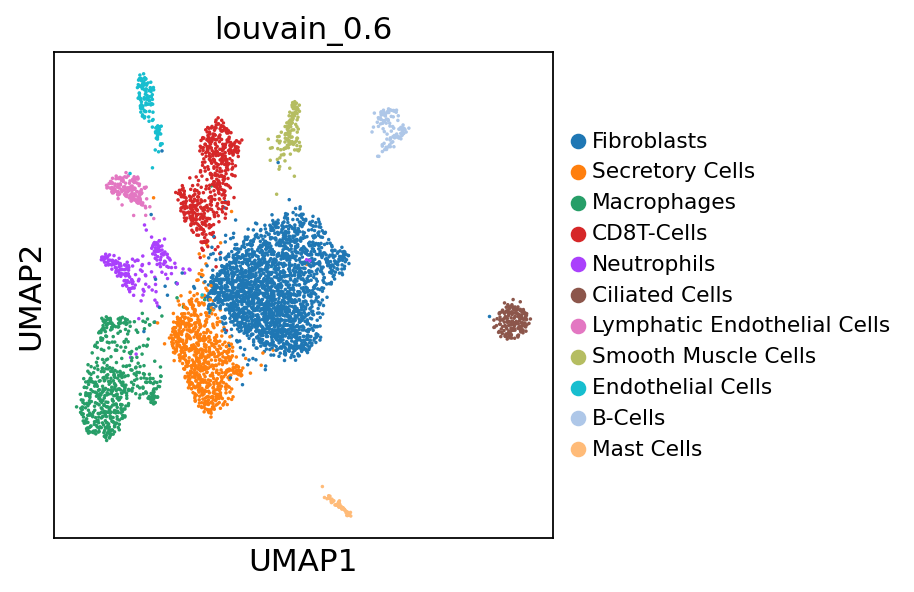

In [ ]:
sc.pl.umap(adata, color='louvain_0.6', legend_fontsize ='x-small', legend_fontweight = "normal",size = 10,legend_loc='right margin')

In [ ]:
adata.obs['merging_clusters']= adata.obs['louvain_0.6']

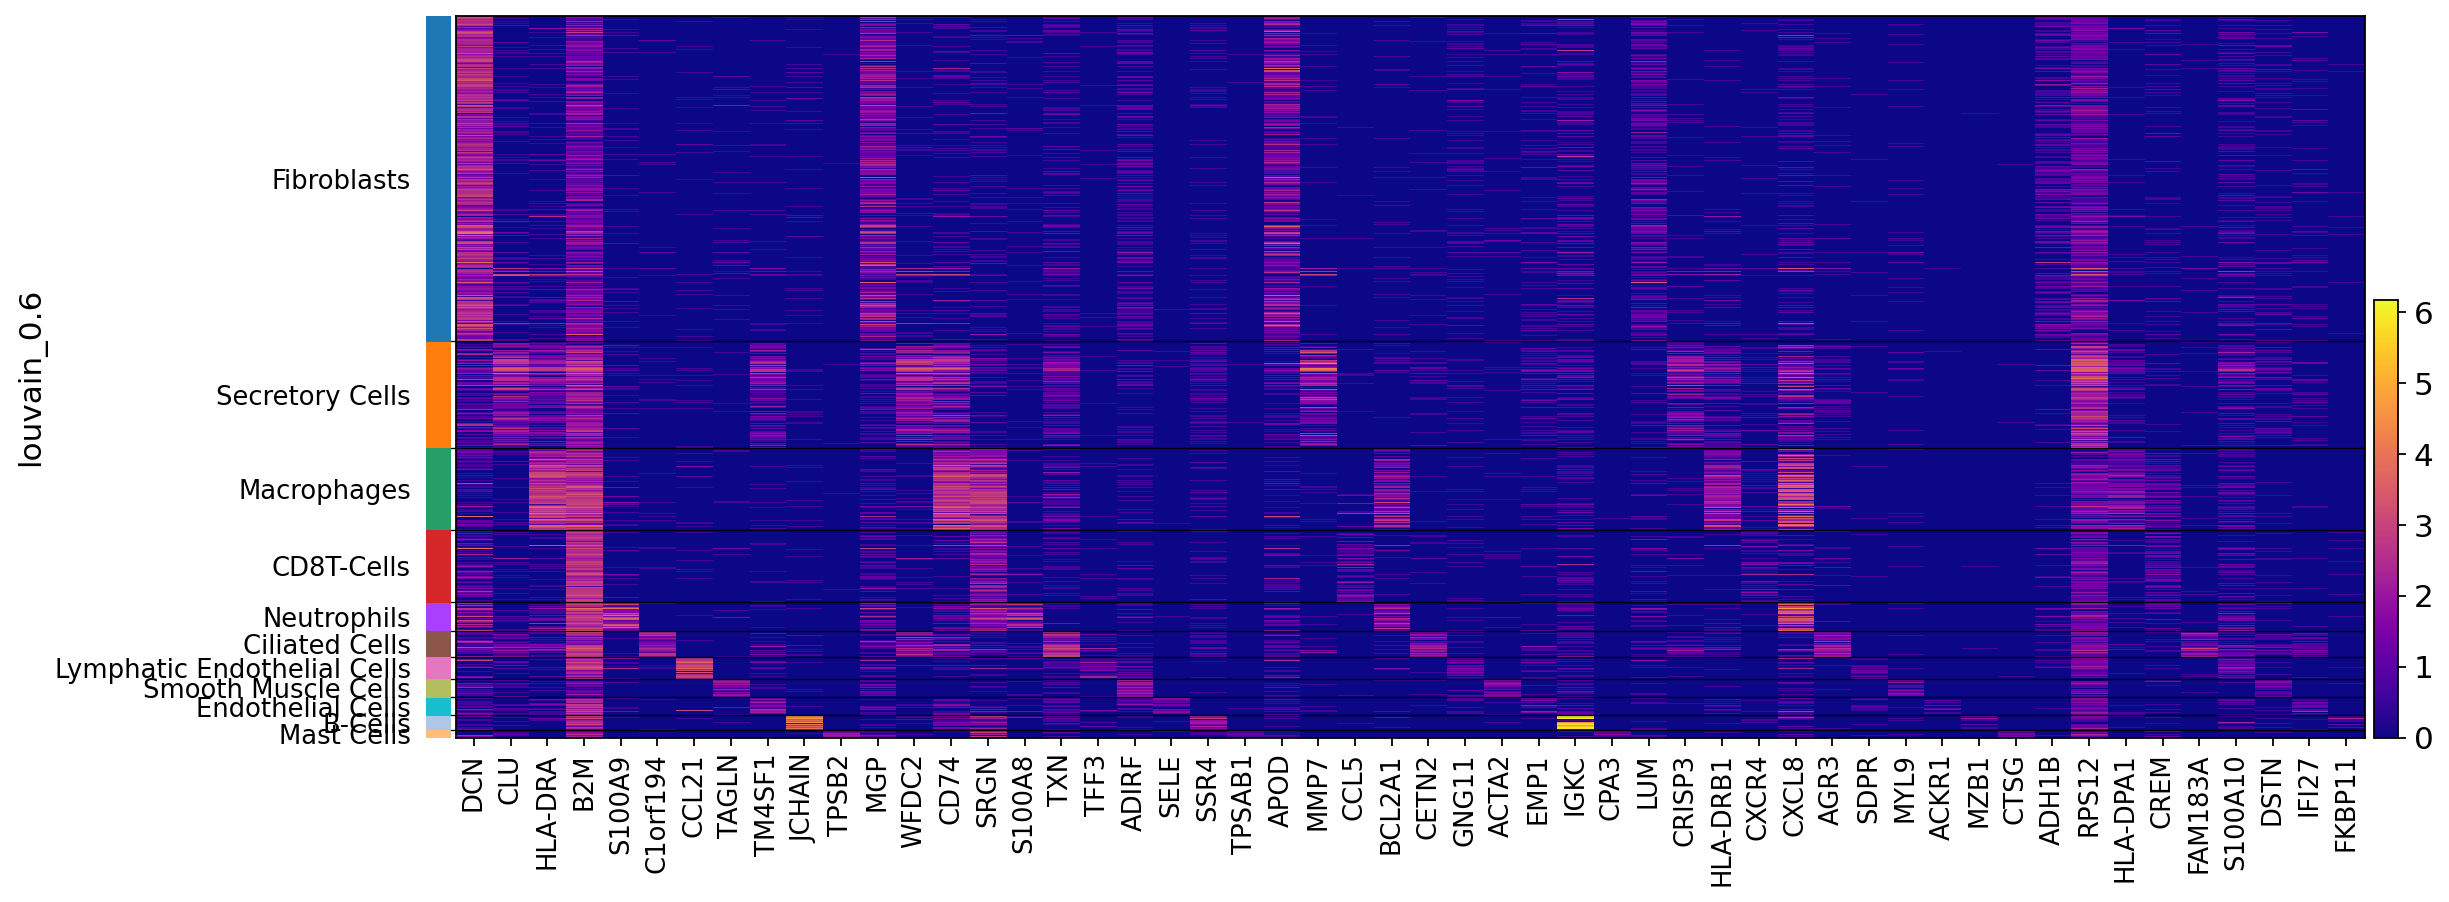

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 15.6, 0, 0.2])

In [ ]:
#Creating heatmap to visualize marker genes 
marker_genes = ['DCN', 'CLU', 'HLA-DRA', 'B2M', 'S100A9', 'C1orf194', 'CCL21', 'TAGLN', 'TM4SF1', 
                'JCHAIN', 'TPSB2', 'MGP', 'WFDC2', 'CD74', 'SRGN', 'S100A8', 'TXN', 'TFF3', 'ADIRF',
                'SELE', 'SSR4', 'TPSAB1', 'APOD', 'MMP7', 'CCL5', 'BCL2A1', 'CETN2', 'GNG11', 'ACTA2',
                'EMP1', 'IGKC', 'CPA3', 'LUM', 'CRISP3', 'HLA-DRB1', 'CXCR4', 'CXCL8', 'AGR3', 'SDPR',
                'MYL9', 'ACKR1', 'MZB1', 'CTSG', 'ADH1B', 'RPS12', 'HLA-DPA1', 'CREM', 'FAM183A', 'S100A10',
                'DSTN', 'IFI27', 'FKBP11']#Plotting the 5 main genes of each clusters
                
sc.pl.heatmap(adata, marker_genes, groupby="louvain_0.6", show_gene_labels='True', log='True')

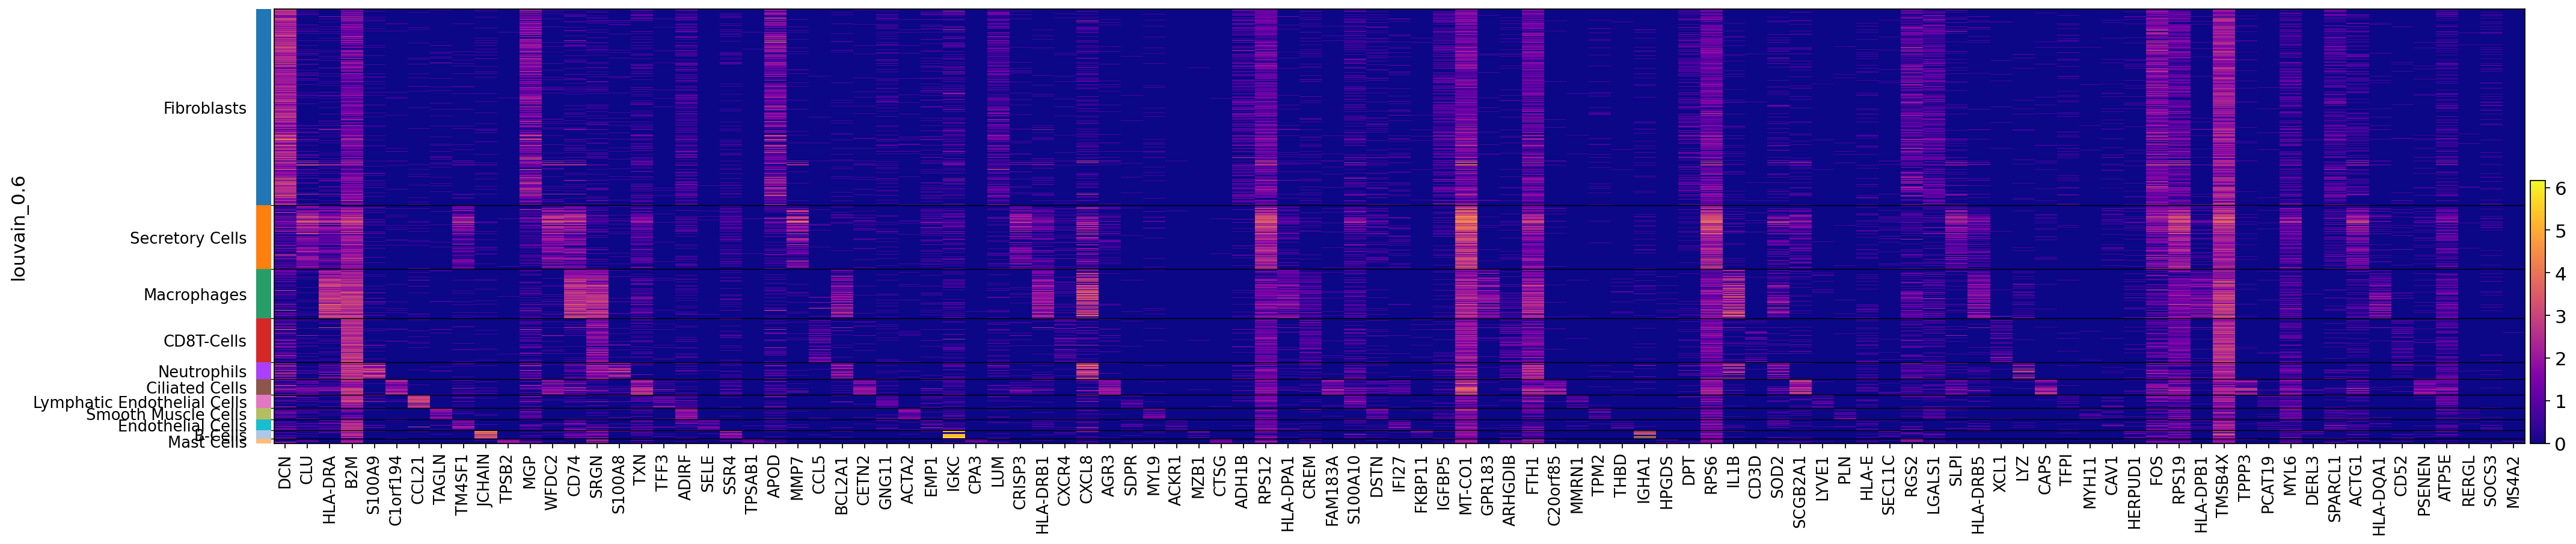

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 30.299999999999997, 0, 0.2])

In [ ]:
marker_genes = ['DCN', 'CLU', 'HLA-DRA', 'B2M', 'S100A9', 'C1orf194', 'CCL21', 'TAGLN',
                'TM4SF1', 'JCHAIN', 'TPSB2', 'MGP', 'WFDC2', 'CD74', 'SRGN', 'S100A8',
                'TXN', 'TFF3', 'ADIRF', 'SELE', 'SSR4', 'TPSAB1', 'APOD', 'MMP7', 'CCL5',
                 'BCL2A1', 'CETN2', 'GNG11', 'ACTA2', 'EMP1', 'IGKC', 'CPA3', 'LUM', 'CRISP3',
                 'HLA-DRB1', 'CXCR4', 'CXCL8', 'AGR3', 'SDPR', 'MYL9', 'ACKR1', 'MZB1', 'CTSG',
                 'ADH1B', 'RPS12', 'HLA-DPA1', 'CREM', 'FAM183A', 'S100A10', 'DSTN', 'IFI27',
                 'FKBP11', 'IGFBP5', 'MT-CO1', 'GPR183', 'ARHGDIB', 'FTH1', 'C20orf85', 'MMRN1',
                 'TPM2', 'THBD', 'IGHA1', 'HPGDS', 'DPT', 'RPS6', 'IL1B', 'CD3D', 'SOD2', 'SCGB2A1',
                 'LYVE1', 'PLN', 'HLA-E', 'SEC11C', 'RGS2', 'LGALS1', 'SLPI', 'HLA-DRB5', 'XCL1', 'LYZ',
                 'CAPS', 'TFPI', 'MYH11', 'CAV1', 'HERPUD1', 'FOS', 'RPS19', 'HLA-DPB1', 'TMSB4X', 'TPPP3',
                 'PCAT19', 'MYL6', 'DERL3', 'SPARCL1', 'ACTG1', 'HLA-DQA1', 'CD52', 'PSENEN', 'ATP5E', 'RERGL',
                 'SOCS3', 'MS4A2'] #Plotting the 10 main genes of each clusters
                
sc.pl.heatmap(adata, marker_genes, groupby="louvain_0.6", show_gene_labels='True', log='True')

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)
Secretory Markers


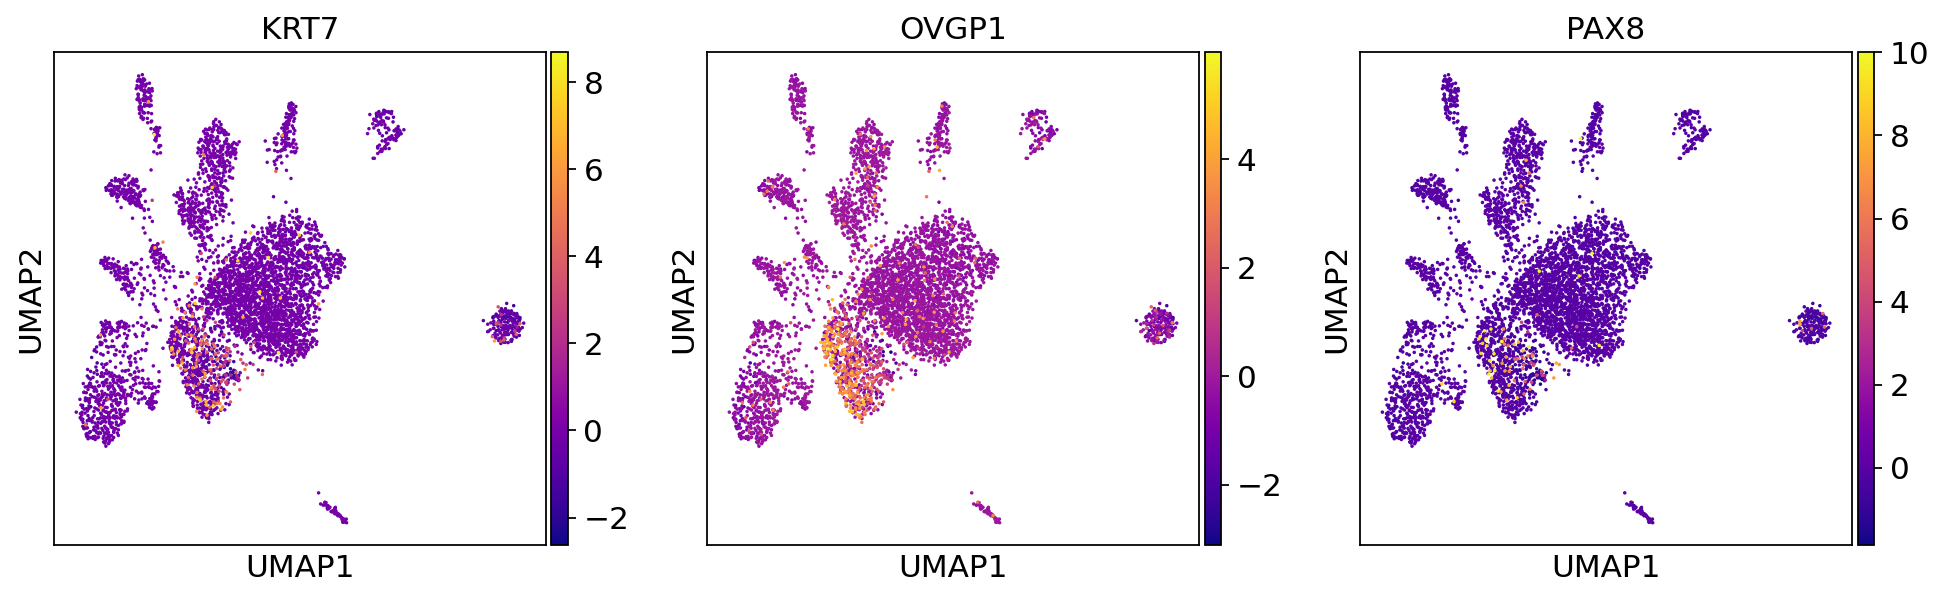

Epithelial Markers


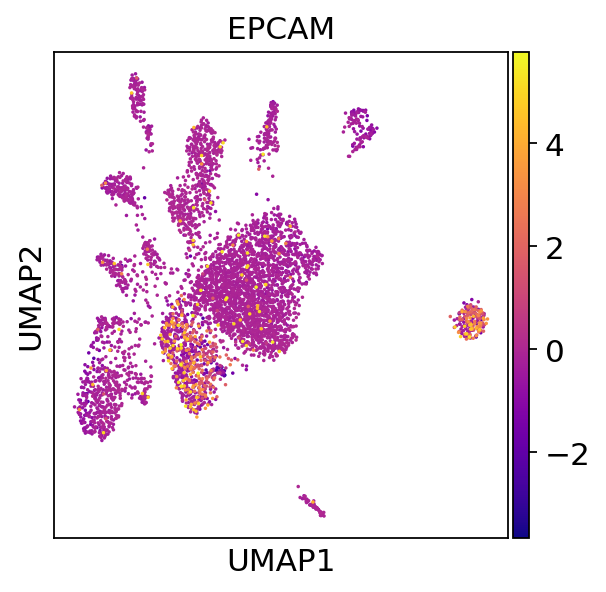

Ciliated Markers


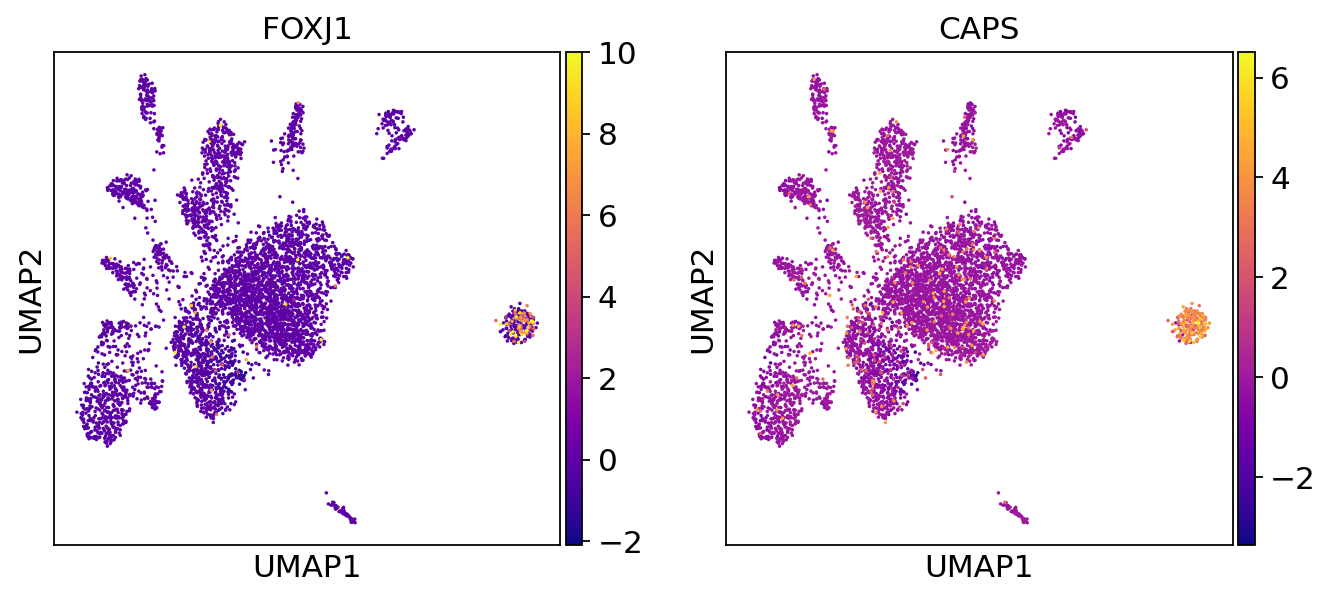

Leukocyte Marker


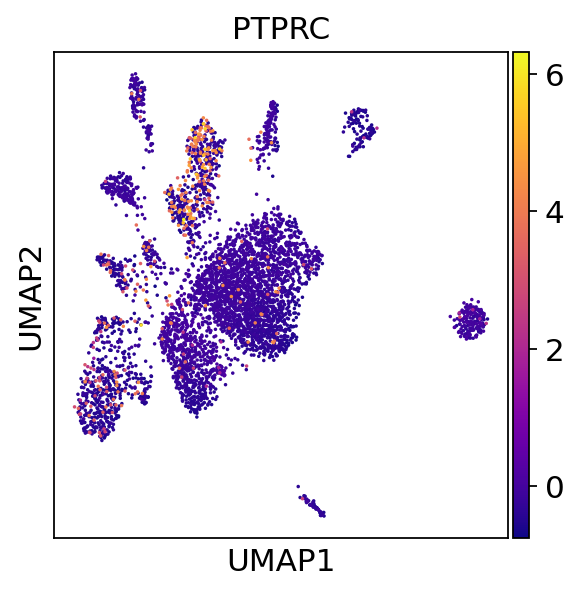

CD8T-cell marker


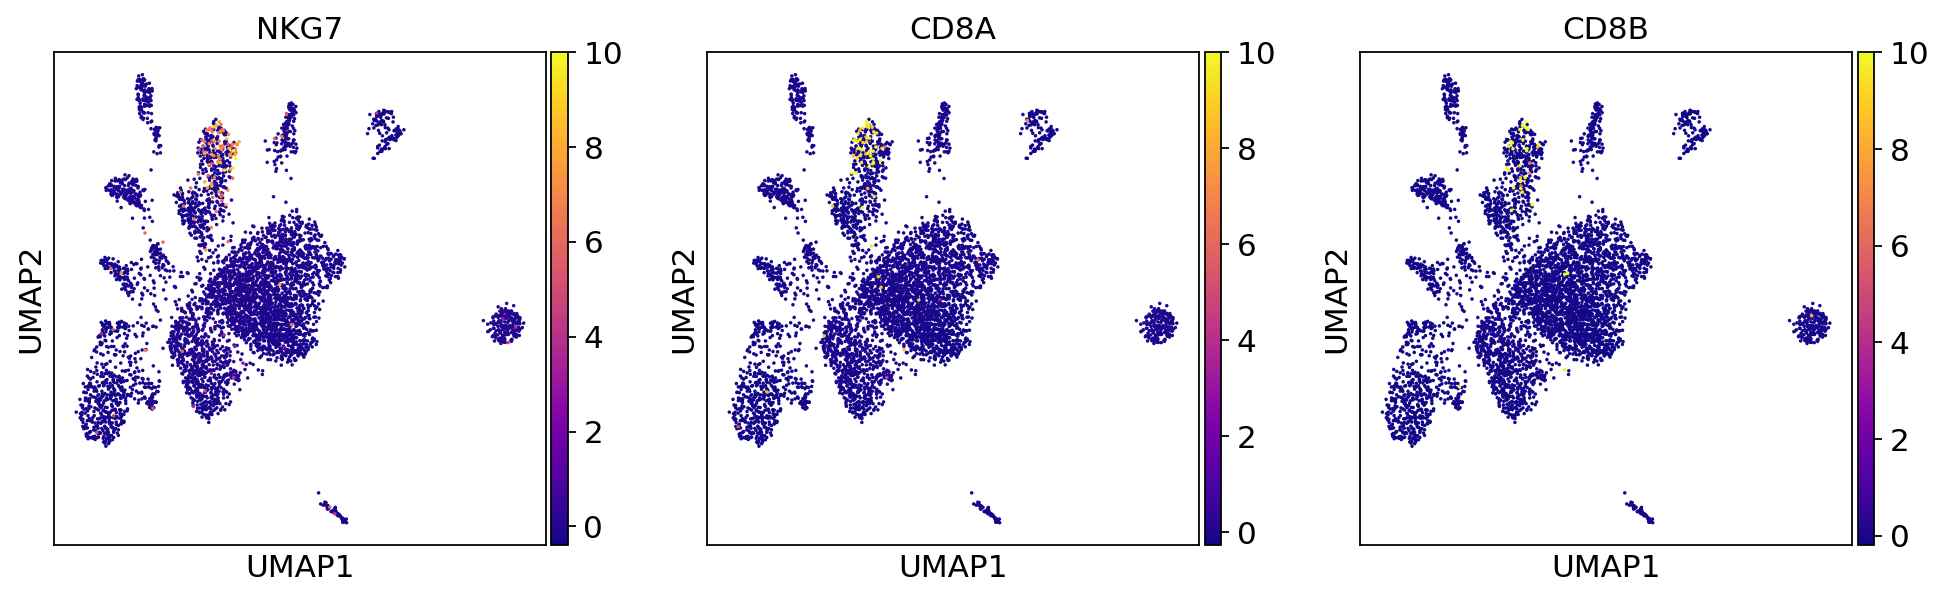

Fibroblast Marker


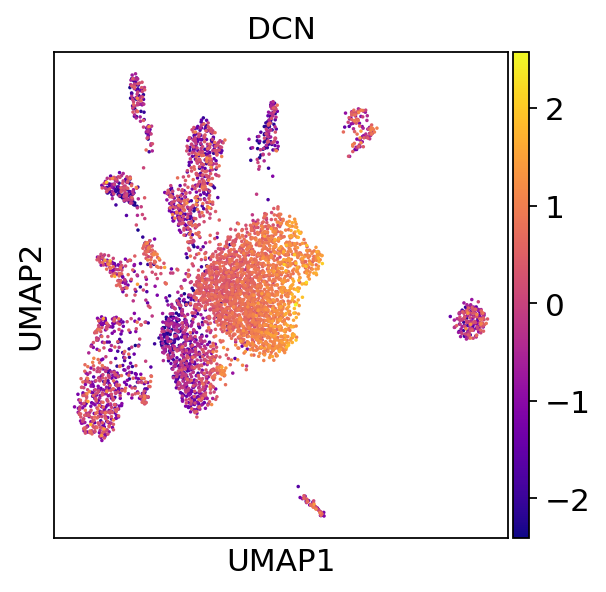

Mast cell Markers


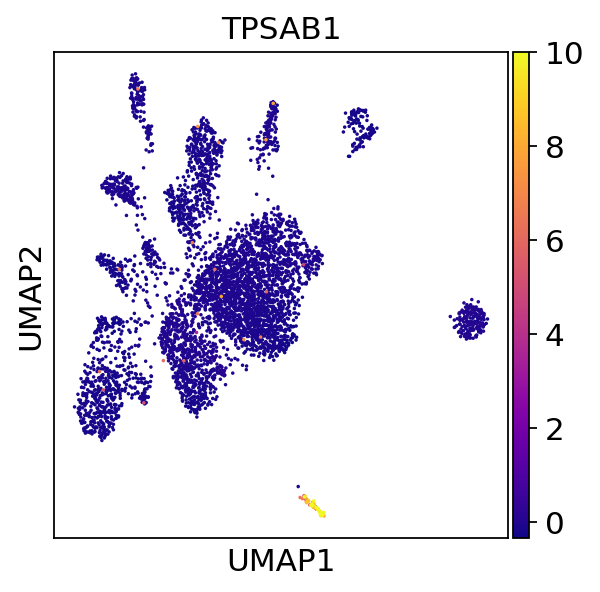

Macrophage markers


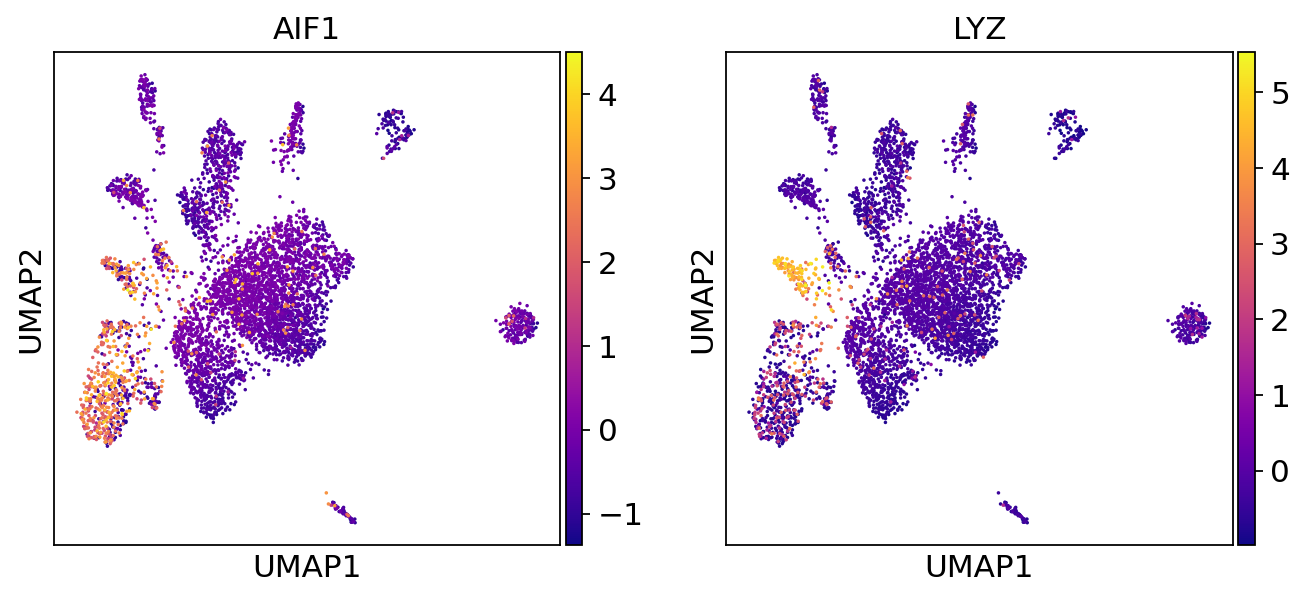

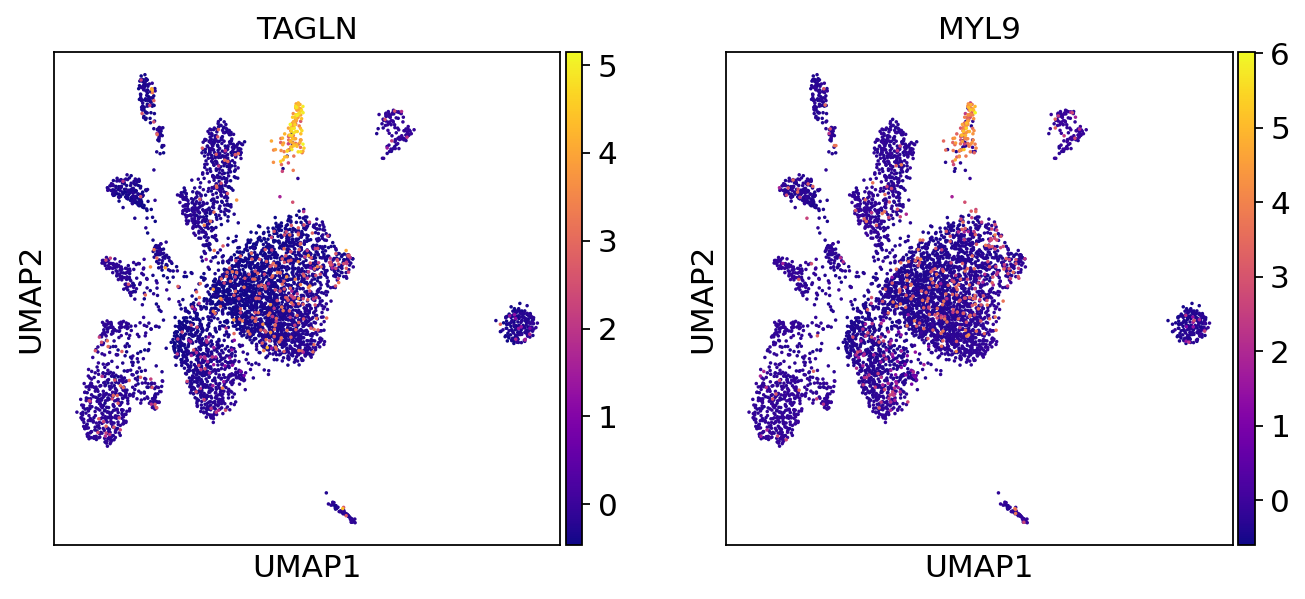

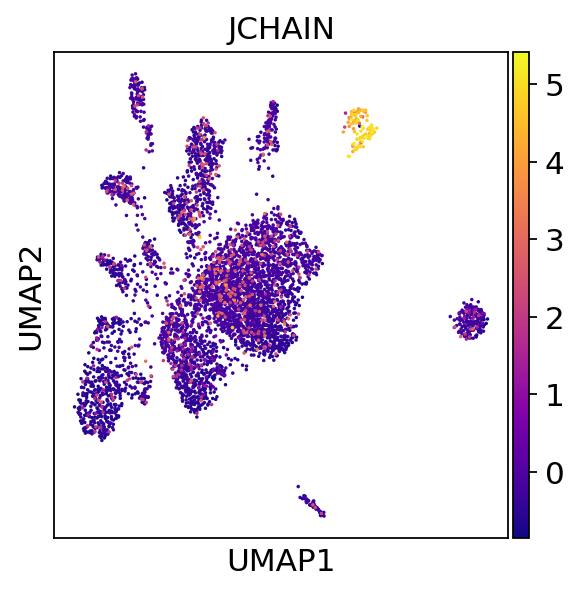

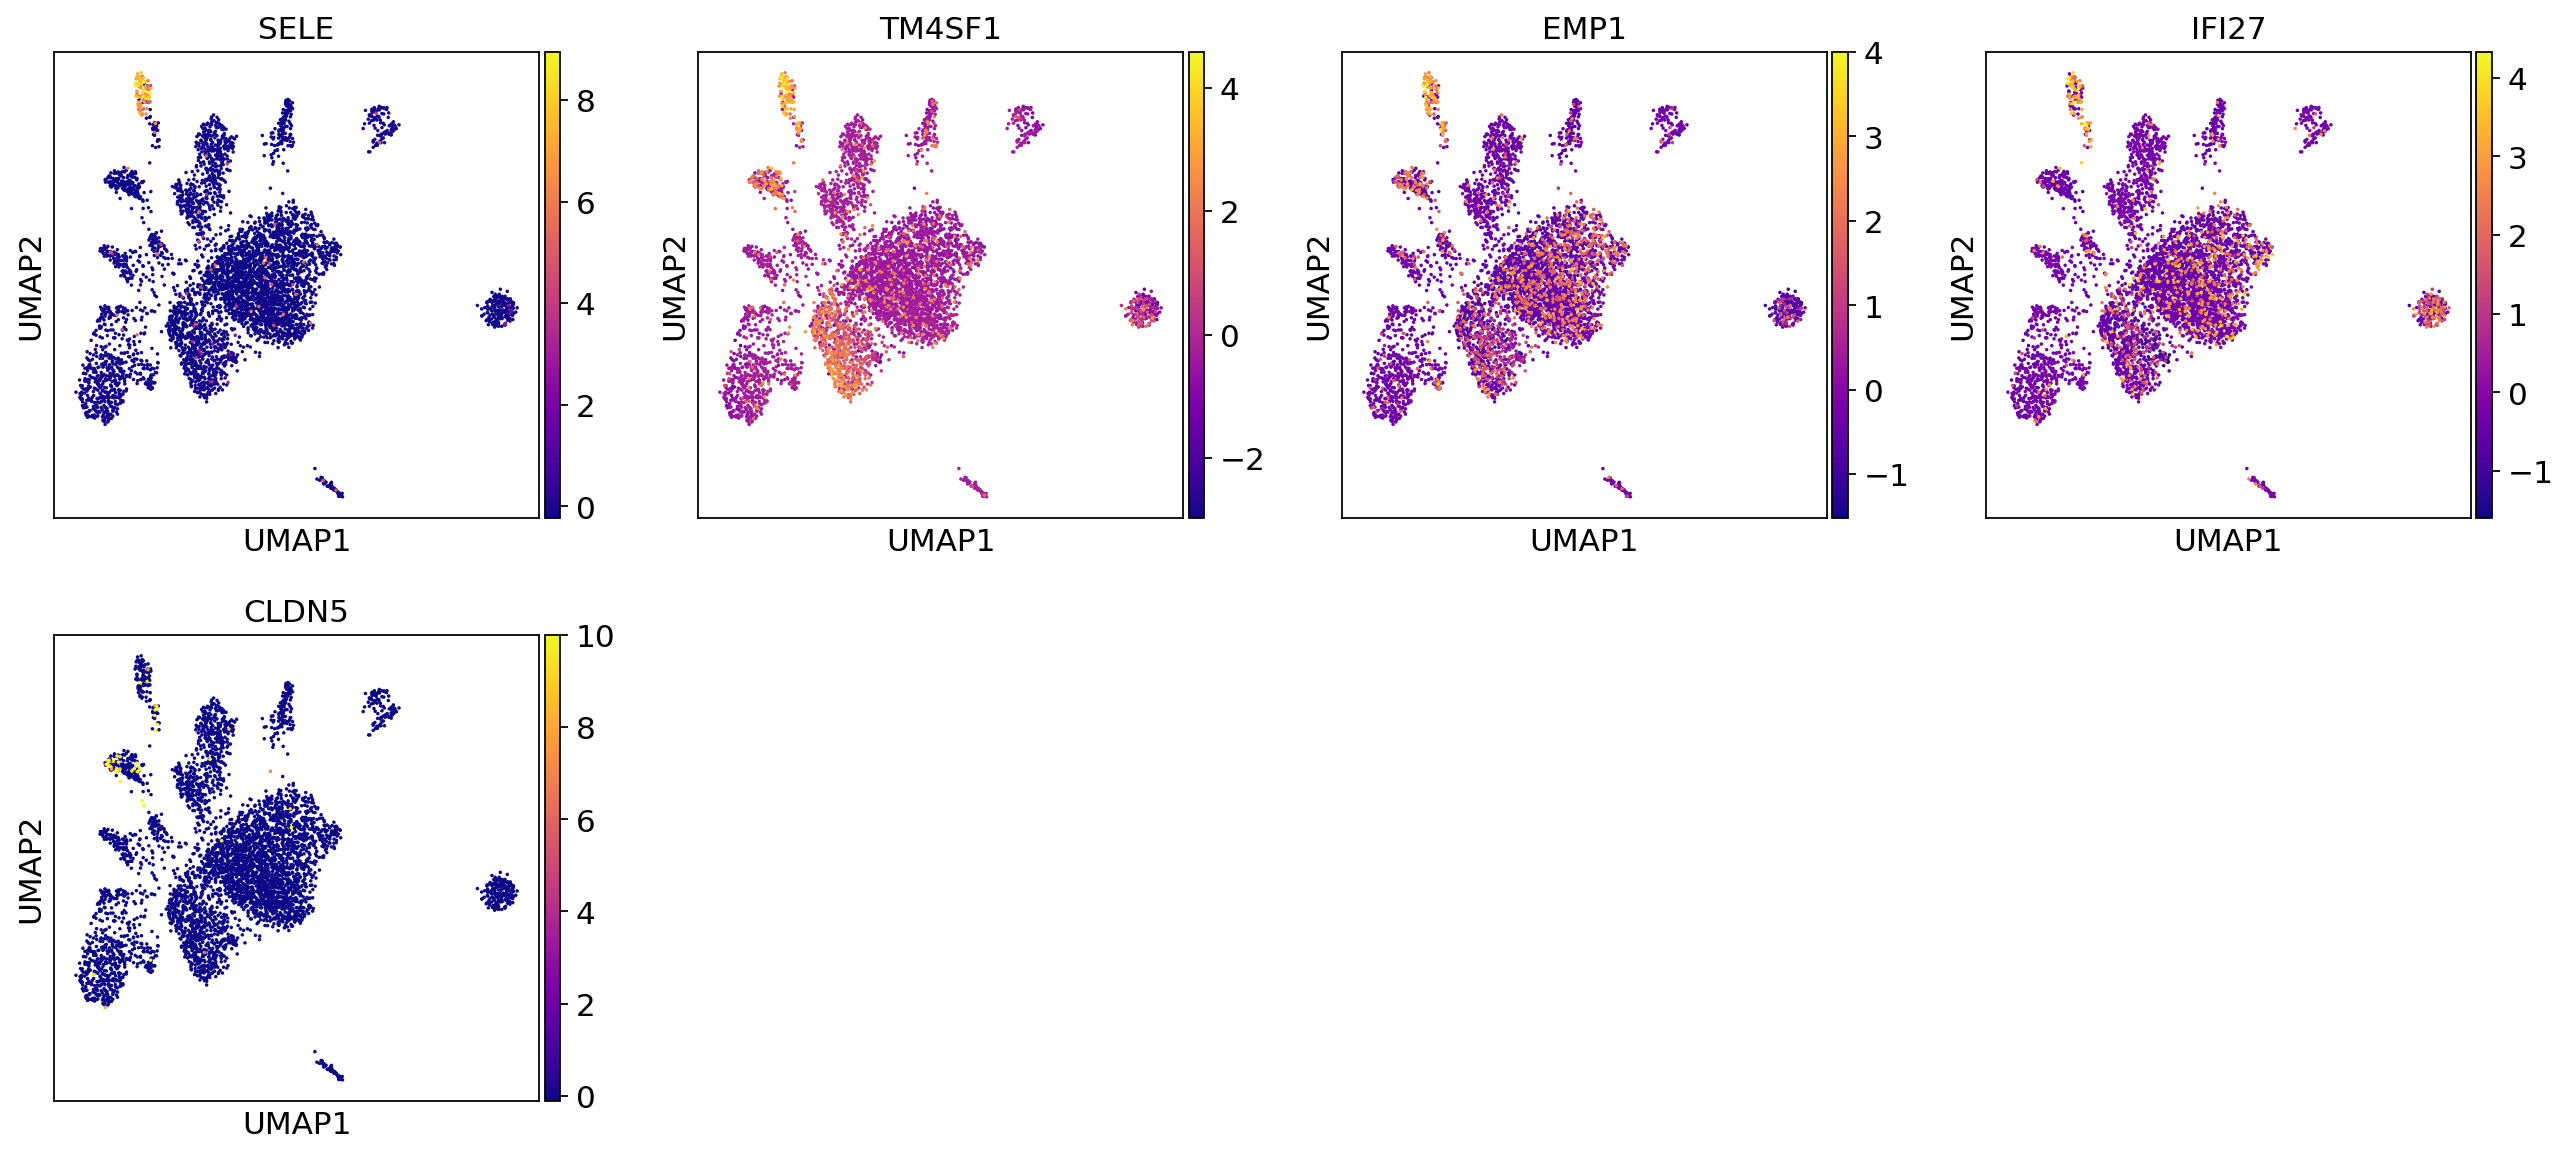

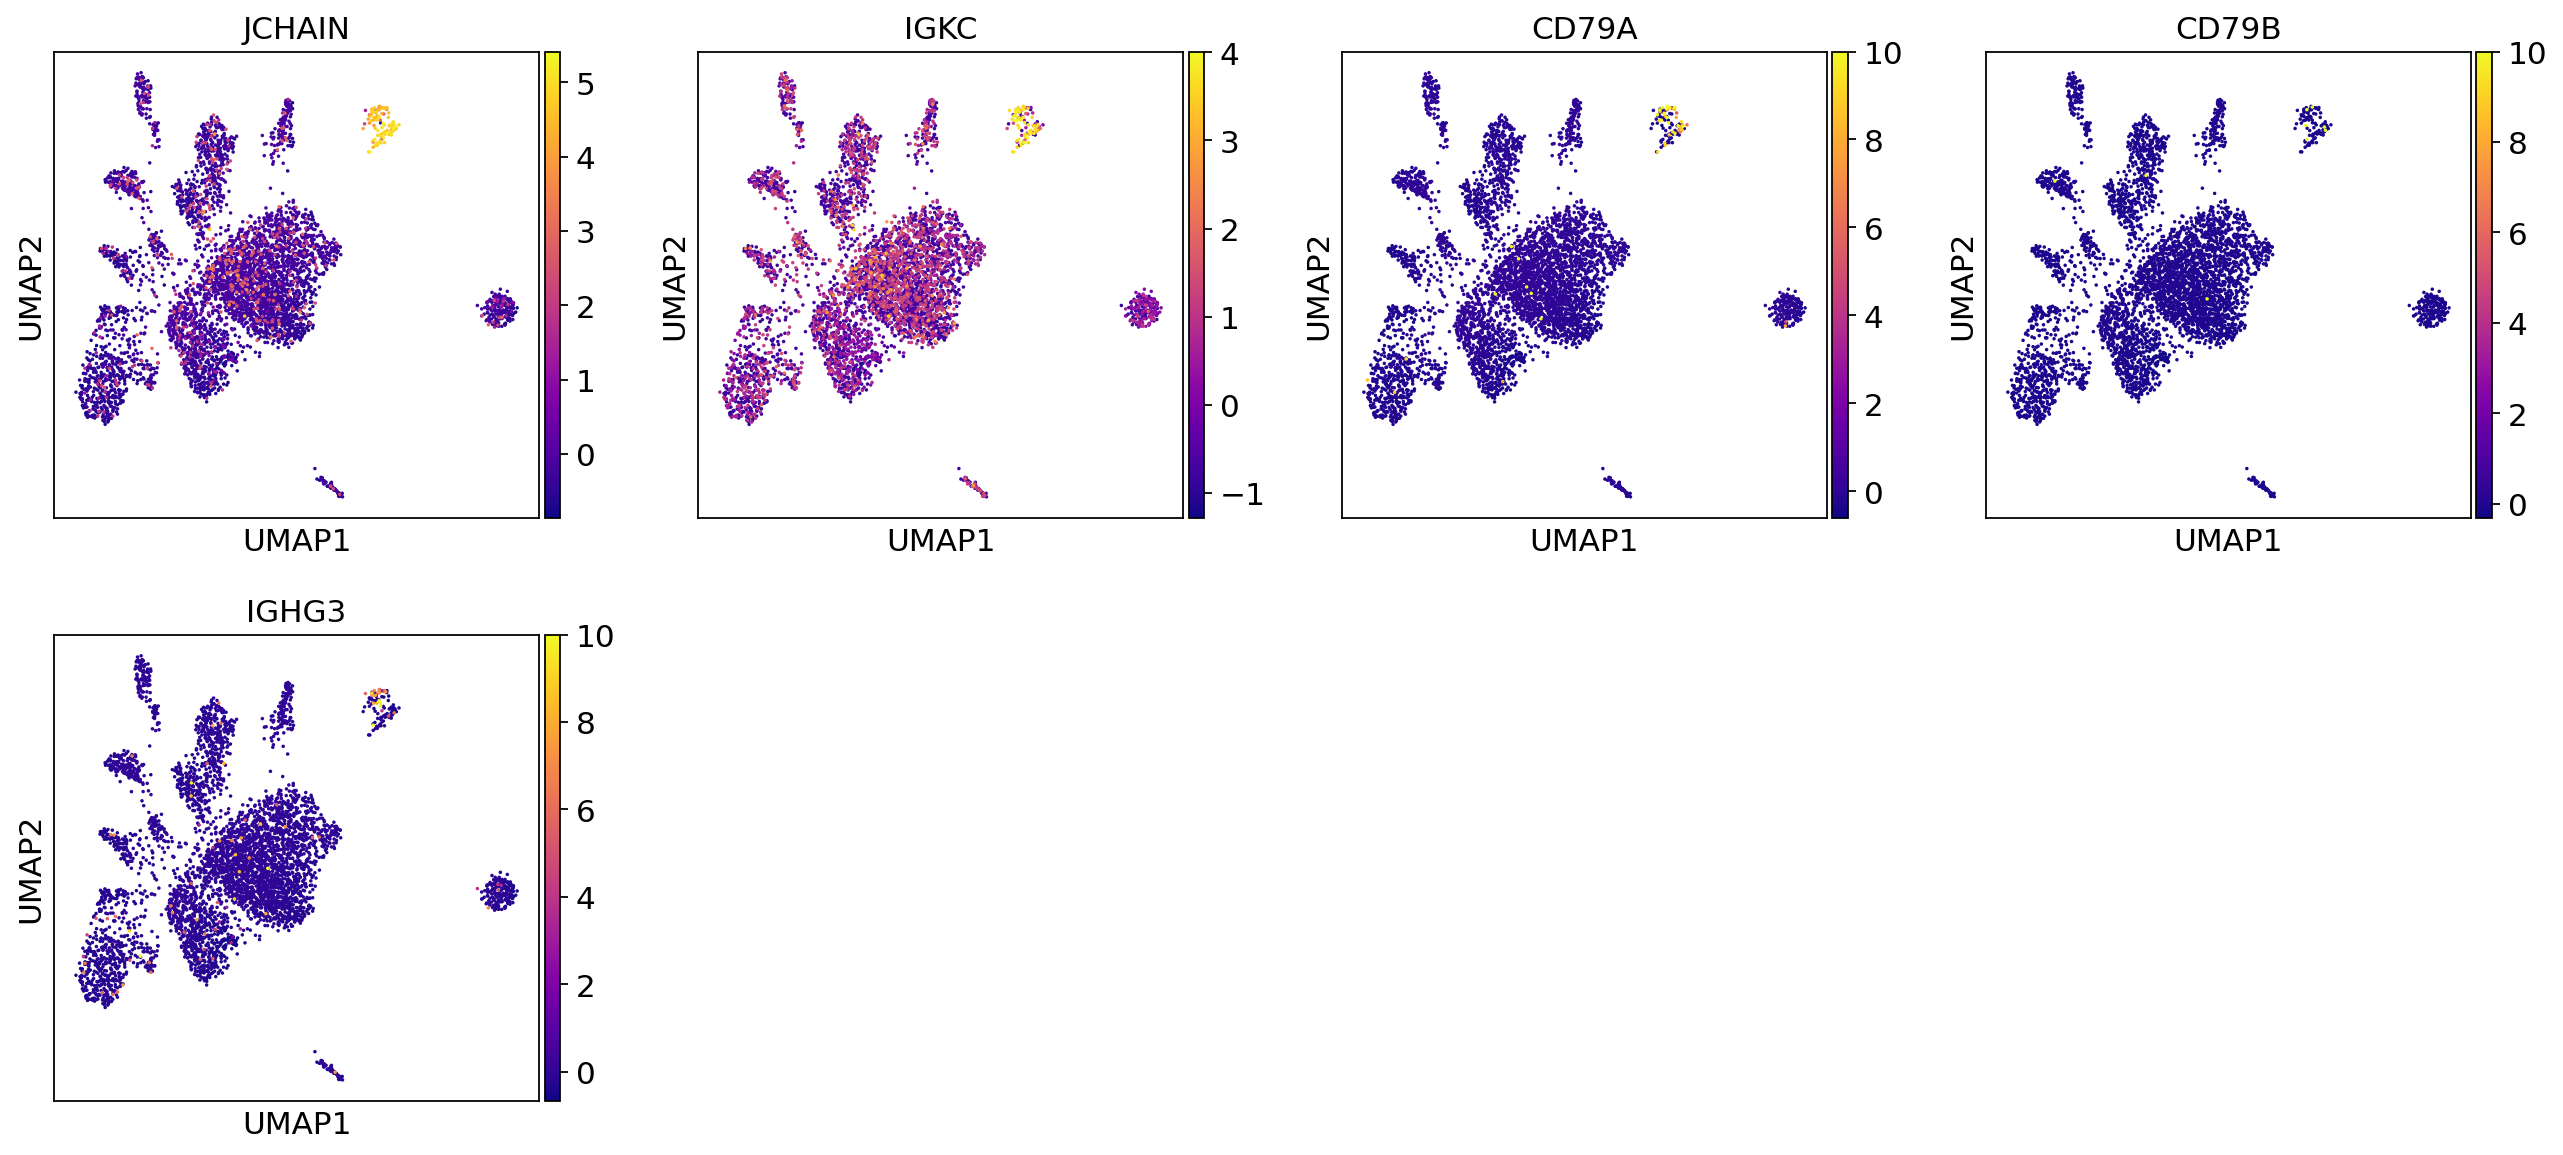

In [ ]:
#Plotting marker genes
sc.tl.umap(adata)

print('Secretory Markers')
sc.pl.umap(adata, color=['KRT7','OVGP1','PAX8'], size = 10, use_raw=False) #Secretory Markers
print('Epithelial Markers')
sc.pl.umap(adata, color='EPCAM', size = 10, use_raw=False) #Epithelial Markers
print('Ciliated Markers')
sc.pl.umap(adata, color=['FOXJ1','CAPS'], size = 10, use_raw=False) #Ciliated Markers
print('Leukocyte Marker')
sc.pl.umap(adata, color=['PTPRC'], size = 10, use_raw=False) #Leukocyte Marker
print('CD8T-cell marker')
sc.pl.umap(adata, color=['NKG7','CD8A','CD8B'], size = 10, use_raw=False) #CD8T-cells Markers
print('Fibroblast Marker')
sc.pl.umap(adata, color=['DCN', 'COL1A1'], size = 10, use_raw=False) #Fibroblast Marker
print('Mast cell Markers')
sc.pl.umap(adata, color=['TPSAB1'], size = 10, use_raw=False) #Mast cells Markers
print('Macrophage markers')
sc.pl.umap(adata, color=['AIF1','LYZ'], size = 10, use_raw=False) #Macrophages Markers
print('Smooth muscle cell markers')
sc.pl.umap(adata, color=['TAGLN','MYL9'], size = 10, use_raw=False) #Smooth muscle cell Markers
print('Endothelial cell markers')
sc.pl.umap(adata, color=['SELE'], size = 10, use_raw=False) #Endothelial cell Markers
print('B-Cells markers')
sc.pl.umap(adata, color=['JCHAIN', 'IGKC', 'CD79A', 'CD79B', 'IGHG3'], size = 10, use_raw=False) #B-cell Markers

#Saving the file

In [ ]:
from google.colab import files

save_file = '/content/drive/My Drive/ClinCluster_DataIntegration/Notebook_Dataset2/scanpy_clustering.h5ad'
adata.write_h5ad(save_file)
print("Edited.")